# Homework for statistics module

Rules for code style:
* All the code in this notebook
* Imports are provided in the head of the notebook
* All the cells could be ran in the right order from the top to the bottom
* Commentaries are required
* All the plots should have: title, axis labels and summaries (if necessary)
* Main summaries are provided in cells using markdown **(your analysis of the results and data is very important!!!)**
* Try to use functions and classes to reduce duplicated code blocks to minimum

Also you can use $\LaTeX$ to write formulas. F.e. $\bar{y} = \frac{1}{n}\sum_{i=1}^n \hat{x}_i$ or on a new line:
$$
    \bar{y} = \frac{1}{n}\sum_{i=1}^n \hat{x}_i
$$
To do so, you can write anything between $\$ \quad \$$ (or  $ \$\$ \quad\$\$ $).

### Evaluation criteria (100% in total)
## Task 1 (30% max)
1. Requested formulas are provided (5%)
2. All necessary experiments are done (10%)
3. Results are analysed with commentaries (15%)

## Tasks 2.1 и 2.2 (40% max)
1. Visualization and/or simple exploratory data analysis are implemented (5% * 2 tasks)
2. Hypotheses are tested (5% * 2 tasks)
3. Results are analysed with commentaries (10%*2 tasks)

## Task 3 (25% max)
1. Visualization and/or simple exploratory data analysis are implemented (5%)
2. Hypotheses are tested (5%)
3. Data was aggregated properly (5%)
4. Results are analysed with commentaries (10%)

### Extra points (5% max)
1. +5% in case clear, "pythonic" and understandable code style


In [61]:
import pandas as pd
import numpy as np
import scipy.stats as st
import math

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
plt.style.use('bmh')

from pylab import rcParams

# plots in svg look more precise
%config InlineBackend.figure_format = 'svg'

# Task 1

## Stratification

The example:

Let's assume, we need to estimate a mean votes count for every election candidate. Suppose there are 3 cities in a country: 1 million factory workers live in city A, 2 million office workers live in city B, and 3 million senior citizens live in city C. We can choose a random sample of 60 votes from the entire population, but there is some chance that the random sample will be poorly balanced between these cities and, therefore, will be biased and of little use ("average temperature in the hospital"), causing a significant error in the estimation. Instead, if we choose to use a simple random sample of 10, 20 and 30 votes from cities A, B and C, respectively, we can get a smaller error in the estimate with the same total sample size. This technique is called stratification.


### The task

Suppose the population is a mixture of 3 normally distributed RVs. In other words, the population can be divided into 3 strata.
$$
    F(X) = a_1 F(X_1) + a_2 F(X_2) + a_3 F(X_3)
$$

**Goals:**  

1. Derive (for example, in the block below, using Markdown) the formulas for point estimates of the mathematical expectation and variance for the average value of subsamples formed in different ways:
- random selection from the entire population;
- random selection of strata in proportion to strata volumes;
- random selection according to the optimal sub-sampling.

2. Calculate point estimates of the mathematical expectation and variance of the mean value for each data sampling method from p.1, provided:
* Experiments should be conducted for 3 cases (for every method from p.1 each):
     * all strata have the same mat. expectations and variance;
     * strata have different mat. expectations, but the same variance;
     * strata have different mat. expectations and variance.
* For each experiment plot histogram of General Population data (using matplotlib or seaborn packages);
* Plot boxplots for sample mean estimated using each sampling method on a single figure to compare the results. Repeat for each experiment.
* You are provided with `GeneralPopulation` class. It already has all necessary methods for sampling and creating general population as a mixture of strata.
* Your goal is to write functions to conduct experiments and visualize the results.   
* Also provide commentaries as summaries and analysis of results after each visualization.


## Solution for Task 1

### Formulas:

Formulas for k-th stratas:
Within the k-th strata let’s take a sample of volume nk:
$$
(X_{1k}, ..., X_{n_k k}), k = \overline{1, L}
$$
Sample mean:
$$
\overline{X}_k = \mu_k = \frac{1}{n_k}\sum^{n_k}_{i=1} X_{ik}
$$
Sample variance:
$$
D^*_k = \sigma^2_k = \frac{1}{n_k}\sum^{n_k}_{i=1} \left(X_{ik} - \overline{X}_k\right)^2
$$

As far as I understood formulas of the mathematical expectation and variance for the average value of subsamples formed in different ways will be the same for every way, except for the value of $w_k$ 

#### Stratified sample point estimations:

$$
E\overline{X}_k = \sum^{L}_{k=1} W_k \mu_k
$$
$$
D(\overline{X}_k) = \sum^{L}_{k=1} W^2_k \frac{\sigma^2_k}{n_k}
$$

Where $W_k = \frac{n_k}{n}$, where $n_k$ is quantity of votes randomly selected from city $k$, $n$ is sum of votes (60 in task)

#### Sample volumes if they are sampled proportionally:

$$
E\overline{X}_k = \sum^{L}_{k=1} W_k \mu_k
$$
$$
D(\overline{X}_k) = \sum^{L}_{k=1} W^2_k \frac{\sigma^2_k}{n_k}
$$

Where $W_k = \frac{n_k}{n}$, where $n_k$ is proportionally selected based on quantity of people in each city (in task for city A it's 10, for city B it's 20 and for city C it's 30), $n$ is sum of votes (60 in task)

#### Sample volumes if they are optimal sampled (Neyman's method):

$$
E\overline{X}_k = \sum^{L}_{k=1} W_k \mu_k
$$
$$
D(\overline{X}_k) = \sum^{L}_{k=1} W^2_k \frac{\sigma^2_k}{n_k}
$$

Where $W_k = \frac{\tilde{n}_k}{n}$, where 
$$
\tilde{n}_k = n \cdot \frac{\tilde{W}_k \sigma_k}{\sum^{L}_{k=1}\tilde{W}_k \sigma_k}
$$
where n is sum of votes (60 in task), and in that formula we take $\tilde{W}_k = \frac{N_k}{N}$, where $N_k$ is quantity of votes in each city (for this task, I couldn't formulate thoughts to say it in general) and $N$ is sum of votes in each city (6 million), therefore 
$\tilde{W}_1= \frac{1000000}{6000000} = \frac{1}{6}, \tilde{W}_2= \frac{1}{3}, \tilde{W}_3= \frac{1}{2}$

**GeneralPopulation class**  
Already has methods for creating general population as a mixture of strata, for generating subsample with random, optimal and stratified techniques:

In [62]:
class GeneralPopulation:

  def __init__(self, 
               means: [float], 
               stds: [float], 
               sizes: [int], 
               random_state: int = 15
               ):
    """
    Initializes our General Population and saves the given distributions
    
    :param means: List of expectations for normal distributions
    :param stds: List of standard deviations for normal distributions
    :param sizes: How many objects will be in each strata
    :param random_state: Parameter fixing randomness. Needed so that when conducting
    experiment repeatedly with the same input parameters, the results remained the same
    """
    self.strats = [st.norm(mean, std) for mean, std in zip(means, stds)]
    self._sample(sizes)
    self.random_state = random_state

  def _sample(self, sizes):
        """Creates a general population sample as a mixture of strata
        
        :param sizes: List with sample sizes of the corresponding normal distributions
        """
        self.strats_samples = [rv.rvs(size) for rv, size in zip(self.strats, sizes)]
        self.general_samples = np.hstack(self.strats_samples)
        self.N = self.general_samples.shape[0]
        
        # number of strata
        self.count_strats = len(sizes)
        
        # ratios for every strata in GP
        self.ws = [size/self.N for size in sizes]
        
        # ME and Std for GP
        self.m = np.mean(self.general_samples)
        self.sigma = np.std(self.general_samples)
        
        # ME and std for all strata
        self.ms = [np.mean(strat_sample) for strat_sample in self.strats_samples]
        self.sigmas = [np.std(strat_sample) for strat_sample in self.strats_samples]

  def random_subsampling(self, size):
      """Creates a random subset of the entire population
      
      :param sizes: subsample size
      """
      rc = np.random.choice(self.general_samples, size=size) 
      return rc
      
  def proportional_subsampling(self, size):
      """Creates a subsample with the number of elements, proportional shares of strata
      
      :param sizes: subsample size
      """
      self.strats_size_proport = [int(np.floor(size*w)) for w in self.ws]
      
      rc = []
      for k in range(len(self.strats_size_proport)):
          rc.append(np.random.choice(self.strats_samples[k],
                                      size=self.strats_size_proport[k]))
      
      return rc
      
  def optimal_subsampling(self, size):
      """Creates a subsample with the optimal number of elements relative to strata
      
      :param sizes: subsample size
      """
      sum_denom = 0
      for k in range(self.count_strats):
          sum_denom += self.ws[k] * self.sigmas[k]
      
      self.strats_size_optimal = [int(np.floor((size*w*sigma)/sum_denom)) for w, sigma in zip(self.ws, self.sigmas)]
      if 0 in self.strats_size_optimal:
          raise ValueError('Strats size is 0, please change variance of smallest strat!')
      
      rc = []
      for k in range(len(self.strats_size_optimal)):
          rc.append(np.random.choice(self.strats_samples[k],
                                      size=self.strats_size_optimal[k]))
      
      return rc   

  def run_experiments(self, n_sub, subsampling_method, n_experiments=1000):
      """Conducts a series of experiments and saves the results
      
      :param subsampling_method: method for creating a subsample
      :param n_experiments: number of experiment starts
      """
      means_s = []
      
      if(len(self.general_samples)<100):
          n_sub = 20
      
      if(subsampling_method == 'random_subsampling'):
          for n in range(n_experiments):
              rc = self.random_subsampling(n_sub)
              
              mean = rc.sum()/len(rc)
              means_s.append(mean)
              
      else:
          for n in range(n_experiments):
              if(subsampling_method == 'proportional_subsampling'):
                  rc = self.proportional_subsampling(n_sub)
              elif(subsampling_method == 'optimal_subsampling'):
                  rc = self.optimal_subsampling(n_sub)
              
              strats_mean = []
      
              for k in range(len(rc)):
                  strats_mean.append(sum(rc[k])/len(rc[k]))
      
              # Mean for a mixture
              means_s.append(sum([w_k*mean_k for w_k, mean_k in zip(self.ws, strats_mean)]))
              
      return means_s

Function for histogram plot:

In [63]:
def histogram_plot(gp):
    sns.histplot(gp.general_samples)

"""HERE IS YOUR CODE
It should be implemented as follows:
* Takes a GeneralPopulation class instance;
* Uses matplotlib or seaborn packages to plot distribution for general population;
* Don't forget a title, grid etc. 
"""

"HERE IS YOUR CODE\nIt should be implemented as follows:\n* Takes a GeneralPopulation class instance;\n* Uses matplotlib or seaborn packages to plot distribution for general population;\n* Don't forget a title, grid etc. \n"

Function for plotting Boxplots for sample mean:

In [64]:
def boxplot_sample_mean(gp):
    data = [gp.run_experiments(N_SUBSAMPLE, 'random_subsampling'),
            gp.run_experiments(N_SUBSAMPLE, 'proportional_subsampling'),
            gp.run_experiments(N_SUBSAMPLE, 'optimal_subsampling')]
    fig = plt.figure(figsize =(10, 7))
    ax = fig.add_subplot()
    ax.set_xticklabels(['random subsampling',
                        'proportional subsampling',
                        'optimal subsampling'])

    plt.axhline(y=gp.m, color='r', linestyle='-')
    
    bp = ax.boxplot(data, patch_artist = True)

    colors = ['#0000FF', '#00FF00', '#FFFF00']
    for patch, color in zip(bp['boxes'], colors):
        patch.set_facecolor(color)



"""HERE IS YOUR CODE
It should be implemented as follows:
* Takes a GeneralPopulation class instance;
* Runs method `run_experiments` for each sampling method and gets vector of mean values;
* Uses matplotlib or seaborn packages to plot boxplots of mean values for each subsampling techniques;
* Axis Y == Mean values; Axis X == subsampling methods;
* Don't forget a title, grid etc. 
"""

"HERE IS YOUR CODE\nIt should be implemented as follows:\n* Takes a GeneralPopulation class instance;\n* Runs method `run_experiments` for each sampling method and gets vector of mean values;\n* Uses matplotlib or seaborn packages to plot boxplots of mean values for each subsampling techniques;\n* Axis Y == Mean values; Axis X == subsampling methods;\n* Don't forget a title, grid etc. \n"

**Parameters for each General Population**  
You can use these or specify your own parameters for strata:

In [65]:
SIZES = (150, 150, 150)
N_SUBSAMPLE = 150
EQUAL_MEAN_EQUAL_STDS_ARGS = {'means': [0, 0, 0], 'stds': [3, 3, 3], 'sizes': SIZES}
DIFFERENT_MEAN_EQUAL_STDS_ARGS = {'means': [15, -1, -17], 'stds': [3, 3, 3], 'sizes':SIZES}
EQUAL_MEAN_DIFFERENT_STDS_ARGS = {'means': [0, 0, 0], 'stds': [3, 7, 11], 'sizes':SIZES}

Because the assignment asks for **General population with DIFFERENT means and DIFFERENT STDs of strata** it will be added below:

In [66]:
DIFFERENT_MEAN_DIFFERENT_STDS_ARGS = {'means': [15, -1, -17], 'stds': [3, 7, 11], 'sizes':SIZES}

**Initialization**

In [67]:
equal_mean_equal_std = GeneralPopulation(means = EQUAL_MEAN_EQUAL_STDS_ARGS['means'],
                                         stds = EQUAL_MEAN_EQUAL_STDS_ARGS['stds'],
                                         sizes = EQUAL_MEAN_EQUAL_STDS_ARGS['sizes'])

diff_mean_equal_std = GeneralPopulation(means = DIFFERENT_MEAN_EQUAL_STDS_ARGS['means'],
                                         stds = DIFFERENT_MEAN_EQUAL_STDS_ARGS['stds'],
                                         sizes = DIFFERENT_MEAN_EQUAL_STDS_ARGS['sizes'])

diff_mean_diff_std = GeneralPopulation(means = DIFFERENT_MEAN_DIFFERENT_STDS_ARGS['means'],
                                         stds = DIFFERENT_MEAN_DIFFERENT_STDS_ARGS['stds'],
                                         sizes = DIFFERENT_MEAN_DIFFERENT_STDS_ARGS['sizes'])

**General population with EQUAL means and EQUAL STDs of strata**  
Distribution histogram:

Text(0.5, 1.0, 'General population with EQUAL means and EQUAL STDs')

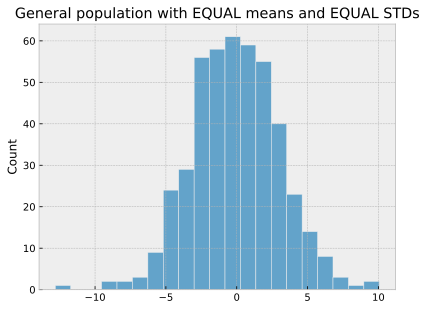

In [68]:
histogram_plot(equal_mean_equal_std)
plt.title('General population with EQUAL means and EQUAL STDs')

We see normal distribution with slightly shifted mean from 0, also std has slightly shifted too, but anyway it is quite close to 3 

Boxplots for sample mean:

C:\Users\Kidma\AppData\Local\Temp\ipykernel_21596\193764737.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['random subsampling',


Text(0.5, 1.0, 'Sample mean with EQUAL means and EQUAL STDs')

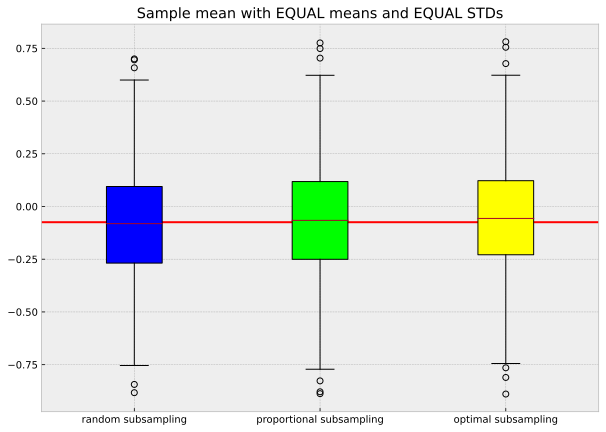

In [69]:
boxplot_sample_mean(equal_mean_equal_std)
plt.title('Sample mean with EQUAL means and EQUAL STDs')

Here we see that mean of GeneralPopulation had shifted, all of them are close to mean, IQR is roughly similar for all of them, in brief they are very similar

**General population with DIFFERENT means and EQUAL STDs of strata**  
Distribution histogram:

Text(0.5, 1.0, 'General population with DIFFERENT means and EQUAL STDs')

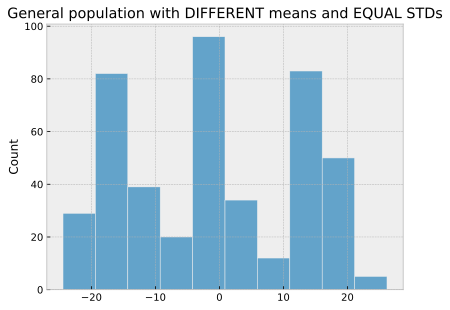

In [70]:
histogram_plot(diff_mean_equal_std)
plt.title('General population with DIFFERENT means and EQUAL STDs')

Here we have trimodal distribution

Boxplots for sample mean:

C:\Users\Kidma\AppData\Local\Temp\ipykernel_21596\193764737.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['random subsampling',


Text(0.5, 1.0, 'Sample mean with DIFFERENT means and EQUAL STDs')

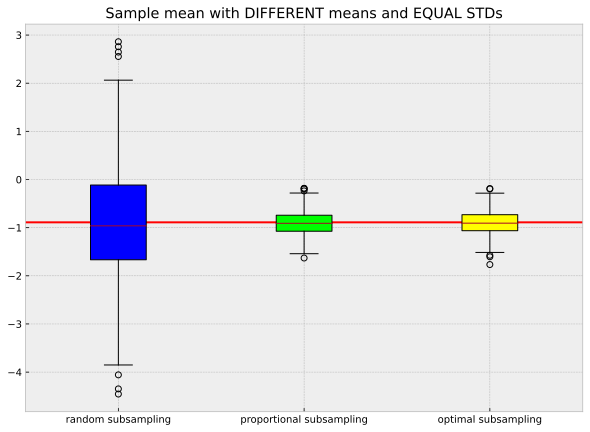

In [71]:
boxplot_sample_mean(diff_mean_equal_std)
plt.title('Sample mean with DIFFERENT means and EQUAL STDs')

Here we can see clear difference between random subsampling and other ones, random has performed the worst, we understand this because it has the biggest IQR (comparable to min and max of other ones), and outliers are the furthest. <br> 
All of them have their median very close to the mean of GeneralPopulation

**General population with DIFFERENT means and DIFFERENT STDs of strata**  
Distribution histogram:

Text(0.5, 1.0, 'General population with DIFFERENT means and DIFFERENT STDs')

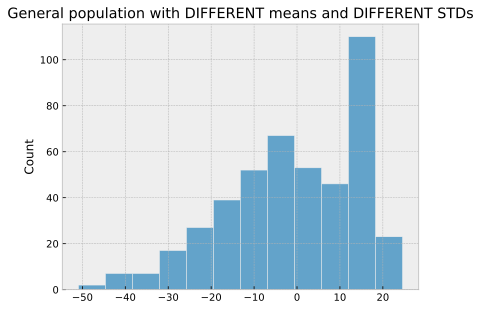

In [72]:
histogram_plot(diff_mean_diff_std)
plt.title('General population with DIFFERENT means and DIFFERENT STDs')

Here we see distribution with no name (I guess), it has no shape at all

Boxplots for sample mean:

C:\Users\Kidma\AppData\Local\Temp\ipykernel_21596\193764737.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['random subsampling',


Text(0.5, 1.0, 'Sample mean with DIFFERENT means and DIFFERENT STDs')

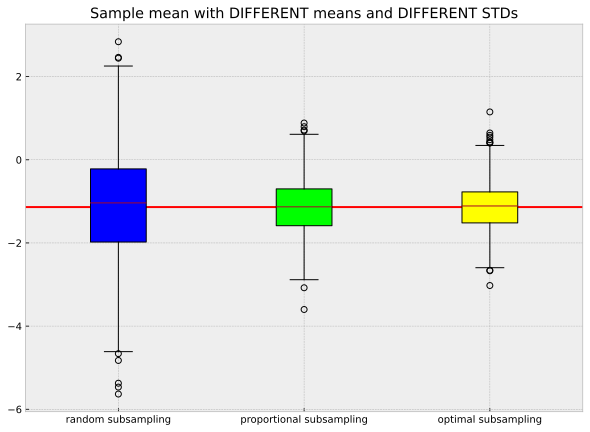

In [73]:
boxplot_sample_mean(diff_mean_diff_std)
plt.title('Sample mean with DIFFERENT means and DIFFERENT STDs')

Similar to previous one <br>
We see big difference between random subsampling and other ones, random has performed the worst, we understand this because it has the biggest IQR (comparable to min and max of other ones), and outliers are the furthest. <br> 
All of them have their median very close to the mean of GeneralPopulation 

With the experiments conducted and statistics estimated we can generate these <b>conclusions</b>: 

- In my opinion optimal subsampling performed the best
- IQR for optimal subsampling and proportional was very low compared to random subsampling
- But if the stratas’ EV and Variances are equal, there is no big difference between them

# Task 2



### Part 1
Using [this criteria](https://support.minitab.com/en-us/minitab-express/1/help-and-how-to/modeling-statistics/regression/how-to/correlation/interpret-the-results/#:~:text=For%20the%20Pearson%20correlation%2C%20an,linear%20relationship%20between%20the%20variables.&text=If%20both%20variables%20tend%20to,represents%20the%20correlation%20slopes%20upward.), check whether there is a correlation between a brain size and intelligence for a dataset consisted both of men and women objects. Also check it for men and women subsamples separately.


### Part 2
Using $Chi^2$ criteria check whether there is a statistical difference between men's and women's choice of auto.  (Features `Sex` и `PreferCar`)


You can download dataset using the following:

In [74]:
from bds_courseware import read_drive_dataset
from bds_courseware import HOMEWORK_DATASETS
brain_data = read_drive_dataset(*HOMEWORK_DATASETS['brain'])  # PART 1
cars_prefes_data = read_drive_dataset(*HOMEWORK_DATASETS['car_perfs'])  # PART 2

In [75]:
brain_data.head()

,Gender,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
0,Female,133,132,124,118,64.5,816932
1,Male,140,150,124,�,72.5,1001121
2,Male,139,123,150,143,73.3,1038437
3,Male,133,129,128,172,68.8,965353
4,Female,137,132,134,147,65.0,951545


In [76]:
brain_data.replace('�', np.NaN, inplace=True)
brain_data.isnull().sum()

Gender       0
FSIQ         0
VIQ          0
PIQ          0
Weight       2
Height       1
MRI_Count    0
dtype: int64

Since Null values are in columns that are not used in task, there will be no imputing

In [77]:
brain_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Gender     40 non-null     object
 1   FSIQ       40 non-null     int64 
 2   VIQ        40 non-null     int64 
 3   PIQ        40 non-null     int64 
 4   Weight     38 non-null     object
 5   Height     39 non-null     object
 6   MRI_Count  40 non-null     int64 
dtypes: int64(4), object(3)
memory usage: 2.3+ KB


Also we will use only FSIQ (which stands for Full-Scale IQ), since it consists of VIQ (Verbal IQ) and PIQ (Performance IQ)

<AxesSubplot: >

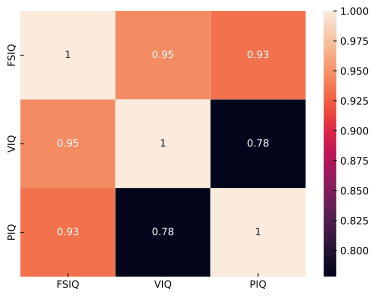

In [78]:
corr = brain_data[['FSIQ', 'VIQ', 'PIQ']].corr()
sns.heatmap(corr, annot=True)

Correlation confirms it (high correlation between FSIQ and both VIQ and PIQ)

Let's state our hypothesis: <br>
$H_0 :$ There is no correlation ($\rho = 0$) <br>
$H_1 :$ There is correlation ($\rho > 0$) <br>
We take $\alpha = 0.01$ as our significance level

In [79]:
coef, p = st.spearmanr(brain_data.FSIQ, brain_data.MRI_Count)

print(f'coef: {coef}, p: {p}')

coef: 0.47214191583899207, p: 0.0020984777996441214


Text(0.5, 1.0, 'Scatter plot for both men and women')

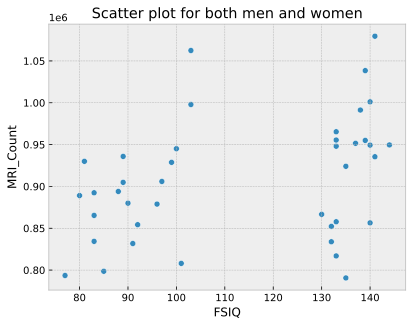

In [80]:
sns.scatterplot(x=brain_data.FSIQ, y=brain_data.MRI_Count)
plt.title('Scatter plot for both men and women')

We got p-value less than $\alpha$. It indicates strong evidence against the null hypothesis, therefore we reject the null hypothesis, and accept the alternative hypothesis.

In [81]:
coef, p = st.spearmanr(brain_data.loc[brain_data['Gender'] == 'Female'].FSIQ,
                       brain_data.loc[brain_data['Gender'] == 'Female'].MRI_Count)

print(f'coef: {coef}, p: {p}')

coef: 0.2991718270724953, p: 0.20006072686083715


Text(0.5, 1.0, 'Scatter plot for women only')

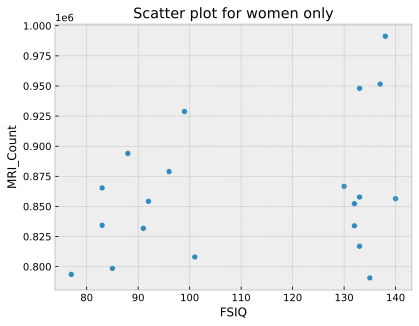

In [82]:
sns.scatterplot(x=brain_data.loc[brain_data['Gender'] == 'Female'].FSIQ,
                y=brain_data.loc[brain_data['Gender'] == 'Female'].MRI_Count)

plt.title('Scatter plot for women only')

We got p-value more than $\alpha$. It indicates strong evidence for the null hypothesis, therefore we retain the null hypothesis because it's statistically significant, and reject the alternative hypothesis.

In [83]:
coef, p = st.spearmanr(brain_data.loc[brain_data['Gender'] == 'Male'].FSIQ,
                       brain_data.loc[brain_data['Gender'] == 'Male'].MRI_Count)

print(f'coef: {coef}, p: {p}')

coef: 0.6224582598536048, p: 0.0033787319187759068


Text(0.5, 1.0, 'Scatter plot for men only')

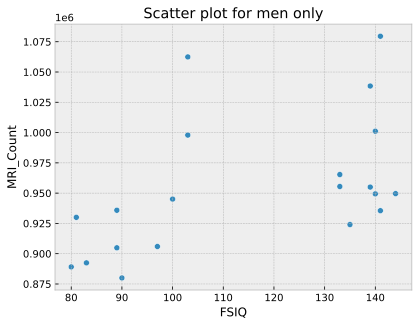

In [84]:
sns.scatterplot(x=brain_data.loc[brain_data['Gender'] == 'Male'].FSIQ,
                y=brain_data.loc[brain_data['Gender'] == 'Male'].MRI_Count)

plt.title('Scatter plot for men only')

We got p-value less than $\alpha$. It indicates strong evidence against the null hypothesis, therefore we reject the null hypothesis, and accept the alternative hypothesis.

<font size='5'> Final analysis:</font> <br>
In result using Spearman's criteria we got that there is a correlation between a brain size and intelligence for a dataset consisted both of men and woman objects and for a dataset with only men, and no correlation for a dataset with only women. <br> 
On plots I honestly don't see correlation in any of the datasets, even though for men it has moderate correlation coefficient (0.62)

<font size='5'> Part 2</font>

In [85]:
cars_prefes_data.head()

,ID,Age,Sex,LicYr,LicMth,ActCar,Kids5,Kids6,PreferCar,Car15K,...,Reliable,Perform,Fuel,Safety,AC/PS,Park,Room,Doors,Prestige,Colour
0,110,18,2,0,2,3,2,2,2,2,...,4,3,3,3,3,3,3,3,3,2
1,111,25,1,8,0,1,2,2,1,1,...,4,4,4,4,3,4,4,2,3,3
2,112,63,2,46,0,3,2,2,3,2,...,3,3,3,3,3,3,3,3,3,3
3,113,51,1,35,0,3,2,2,2,2,...,3,3,3,4,3,3,3,3,1,3
4,114,19,1,2,0,2,2,2,2,1,...,3,4,3,3,2,3,3,2,3,3


In [86]:
cars_prefes_data.Sex.value_counts()

2    150
1    150
Name: Sex, dtype: int64

Further up for men we will consider '1', and '2' for women

<AxesSubplot: xlabel='PreferCar', ylabel='count'>

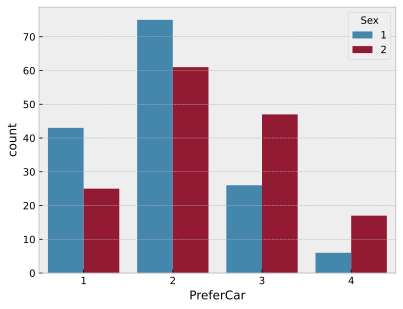

In [87]:
sns.countplot(data=cars_prefes_data, x='PreferCar', hue='Sex')

Text(0.5, 1.0, 'Distribution for women')

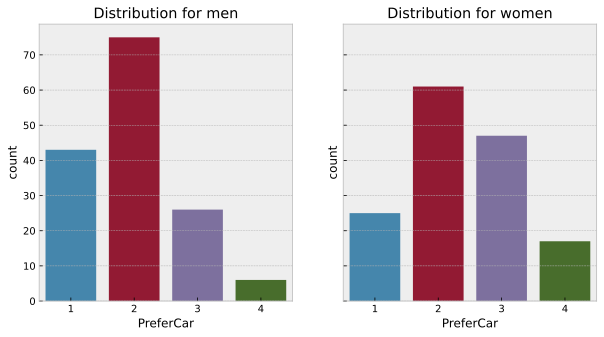

In [88]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5), sharey=True)

sns.countplot(x=cars_prefes_data.loc[cars_prefes_data['Sex'] == 1].PreferCar, ax=axs[0])
axs[0].set_title('Distribution for men')

sns.countplot(x=cars_prefes_data.loc[cars_prefes_data['Sex'] == 2].PreferCar, ax=axs[1])
axs[1].set_title('Distribution for women')

Let's state our hypothesis: <br>
$H_0 :$ There is no statistical difference between men's and women's choice of auto <br>
$H_1 :$ There is statistical difference between men's and women's choice of auto <br>
We take $\alpha = 0.01$ as our significance level

In [89]:
# creating contingency table
obs = pd.crosstab(cars_prefes_data.Sex,
                 cars_prefes_data.PreferCar)

obs

PreferCar,1,2,3,4
Sex,,,,
1,43,75,26,6
2,25,61,47,17


In [90]:
coef, p, dof, expected = st.chi2_contingency(obs)

print(f'coef: {coef}, p: {p}')

coef: 17.507847808569526, p: 0.0005555699275518034


We got p-value less than $\alpha$. It indicates strong evidence against the null hypothesis, therefore we reject the null hypothesis, and accept the alternative hypothesis. 

<font size='5'> Answer:</font> <br>
There is statistical difference between men's and women's choice of auto, we got that result by analyzing data with chi2 criteria <br>
We can even see it on the plot, although they both prefer '2' the most, but in other types car count distribution is different

# Task 3

You can find and download a dataset there:
https://www.kaggle.com/russellyates88/suicide-rates-overview-1985-to-2016


1) For any country (you are free to choose any of the presented) 
 *  Visualize a feature **suicides_no** considering other features: **sex**, **age** (or **generation**) and year;
 *  Check whether there is statistical difference for suicide number between these groups: men / women. If it is found, can we claim that people of certain sex are more prone to suicides or do we need additional information?

2) For 2016: divide countries into 3-4 groups according to the values of the **gdp_per_capita** feature (use statistical characteristics to determine how to divide the data into groups), check if the suicides / 100k pop indicator differs in these groups. Do not forget that for each country you have several values and they need to be aggregated or checked for each group separately.

In [91]:
suicide_data = pd.read_csv('master.csv')

In [92]:
suicide_data.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


Since we don't have missing values in columns which we will use assignment there will be no imputing, we will just drop column with missing values

In [93]:
suicide_data.isnull().sum()

country                   0
year                      0
sex                       0
age                       0
suicides_no               0
population                0
suicides/100k pop         0
country-year              0
HDI for year          19456
 gdp_for_year ($)         0
gdp_per_capita ($)        0
generation                0
dtype: int64

In [94]:
suicide_data.drop('HDI for year', axis=1, inplace=True)
suicide_data.isnull().sum()

country               0
year                  0
sex                   0
age                   0
suicides_no           0
population            0
suicides/100k pop     0
country-year          0
 gdp_for_year ($)     0
gdp_per_capita ($)    0
generation            0
dtype: int64

I will use Iceland as a country of research:

In [95]:
iceland_data = suicide_data.loc[suicide_data['country'] == 'Iceland']

In [96]:
iceland_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 382 entries, 11674 to 12055
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             382 non-null    object 
 1   year                382 non-null    int64  
 2   sex                 382 non-null    object 
 3   age                 382 non-null    object 
 4   suicides_no         382 non-null    int64  
 5   population          382 non-null    int64  
 6   suicides/100k pop   382 non-null    float64
 7   country-year        382 non-null    object 
 8    gdp_for_year ($)   382 non-null    object 
 9   gdp_per_capita ($)  382 non-null    int64  
 10  generation          382 non-null    object 
dtypes: float64(1), int64(4), object(6)
memory usage: 35.8+ KB


<AxesSubplot: xlabel='sex', ylabel='suicides_no'>

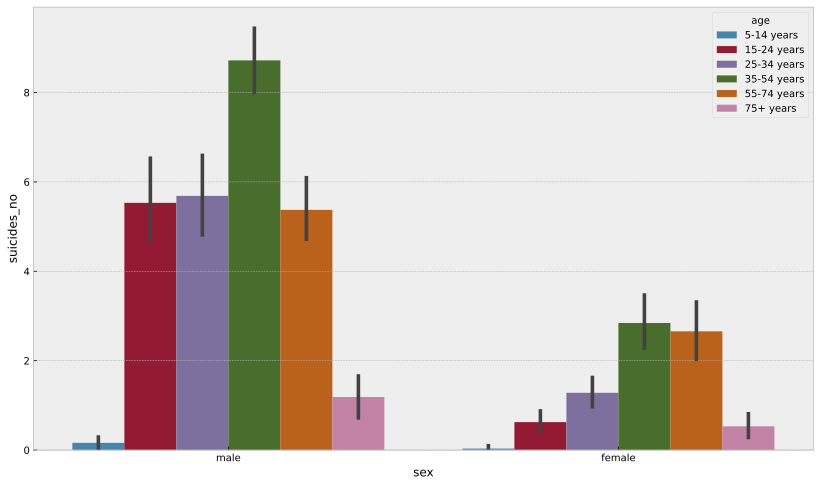

In [97]:
plt.figure(figsize=(14, 8))
hue_order = ['5-14 years', '15-24 years', '25-34 years', '35-54 years', '55-74 years', '75+ years']
sns.barplot(x = 'sex', y = 'suicides_no', hue = 'age', data = iceland_data, hue_order=hue_order)

Text(0.5, 1.0, 'Lineplot of suicides_no for separate male and female over the years')

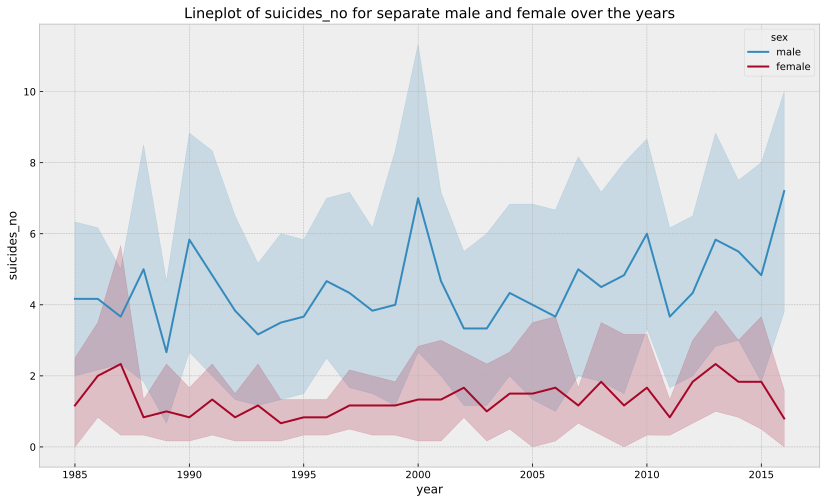

In [98]:
plt.figure(figsize=(14, 8))
sns.lineplot(x='year', y='suicides_no', hue='sex', data=iceland_data)
plt.title('Lineplot of suicides_no for separate male and female over the years')

Text(0.5, 1.0, 'Lineplot of suicides_no for different ages over the years')

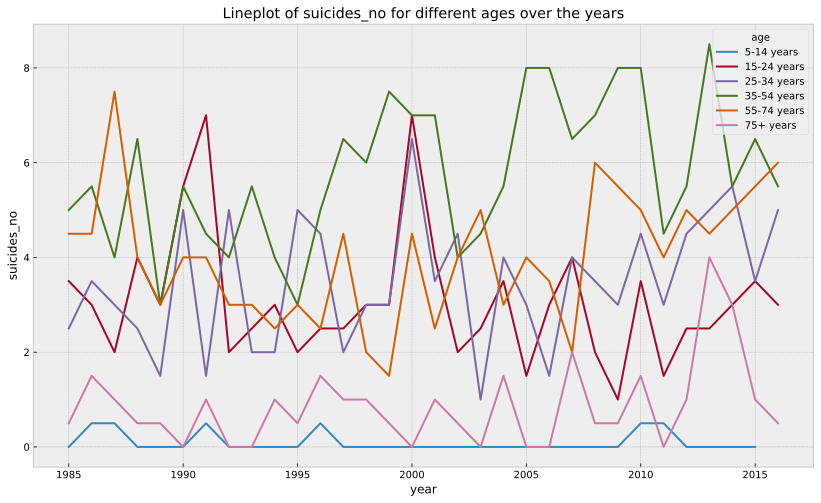

In [99]:
plt.figure(figsize=(14, 8))
sns.lineplot(x='year', y='suicides_no', hue='age', data=iceland_data, errorbar=None, hue_order=hue_order)
# Confidence interval removed because it looks even more messy and almost impossible to understand otherwise
plt.title('Lineplot of suicides_no for different ages over the years')

Let's state our hypothesis: <br>
$H_0 :$ There is no statistical difference between men's and women's suicide rate <br>
$H_1 :$ There is statistical difference between men's and women's suicide rate <br>
We take $\alpha = 0.01$ as our significance level

In [100]:
obs = pd.crosstab(iceland_data.sex,
                       iceland_data.suicides_no)

obs

suicides_no,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
sex,,,,,,,,,,,,,,,
female,78,45,33,15,10,5,4,0,0,0,1,0,0,0,0
male,40,14,12,10,23,19,20,12,15,7,9,4,2,3,1


In [101]:
coef, p, dof, expected = st.chi2_contingency(obs)

print(f'coef: {coef}, p: {p:.6f}')

coef: 113.679969183359, p: 0.000000


We got p-value less than $\alpha$. It indicates strong evidence against the null hypothesis, therefore we reject the null hypothesis, and accept the alternative hypothesis. 

<font size='5'> Answer:</font> <br>
There is statistical difference between men's and women's suicide rate, we got that result by analysing data with chi2 criteria <br>
We can even see it on the plot, although the highest rate for both of them is at '35-54 years', but in other ages distribution is different, men have suicide rate at '15-24 years', '25-34 years', '55-74 years' roughly the same, while women have significant difference <br>
If we will analyse lineplot with hue=sex we can see that men tend to commit more suicides every ~10 years, but women don't do that, I wonder why

<font size='5'> Part 2</font>

In [102]:
suicide_data_2016 = suicide_data.loc[suicide_data['year'] == 2016]

In [103]:
suicide_data_2016.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,gdp_for_year ($),gdp_per_capita ($),generation
1248,Armenia,2016,male,75+ years,12,61956,19.37,Armenia2016,"10,546,135,160",3788,Silent
1249,Armenia,2016,male,55-74 years,16,237813,6.73,Armenia2016,"10,546,135,160",3788,Boomers
1250,Armenia,2016,male,35-54 years,16,350633,4.56,Armenia2016,"10,546,135,160",3788,Generation X
1251,Armenia,2016,male,15-24 years,5,202220,2.47,Armenia2016,"10,546,135,160",3788,Millenials
1252,Armenia,2016,female,75+ years,2,102414,1.95,Armenia2016,"10,546,135,160",3788,Silent


In [104]:
suicide_data_2016['gdp_per_capita ($)'].describe()

count      160.000000
mean     25665.125000
std      21243.939779
min       3788.000000
25%      10432.500000
50%      14595.000000
75%      47259.000000
max      64708.000000
Name: gdp_per_capita ($), dtype: float64

I decided to group by percentiles of gdp_per_capita: <br>
I used percentiles because we get equal number of objects in each group, and in my opinion the higher the 'gdp_per_capita ($)' the lower the suicide rate, it will be interesting to check if I'm right <br>

In [105]:
perc25 = suicide_data_2016.loc[suicide_data_2016['gdp_per_capita ($)'] 
                               <= suicide_data_2016['gdp_per_capita ($)'].quantile(0.25)]

perc50 = suicide_data_2016.loc[(suicide_data_2016['gdp_per_capita ($)'].quantile(0.25) < suicide_data_2016['gdp_per_capita ($)']) &
                               (suicide_data_2016['gdp_per_capita ($)'] <= suicide_data_2016['gdp_per_capita ($)'].quantile(0.5))]

perc75 = suicide_data_2016.loc[(suicide_data_2016['gdp_per_capita ($)'].quantile(0.5) < suicide_data_2016['gdp_per_capita ($)']) &
                               (suicide_data_2016['gdp_per_capita ($)'] <= suicide_data_2016['gdp_per_capita ($)'].quantile(0.75))]

perc100 = suicide_data_2016.loc[(suicide_data_2016['gdp_per_capita ($)'].quantile(0.75) < suicide_data_2016['gdp_per_capita ($)']) &
                               (suicide_data_2016['gdp_per_capita ($)'] <= suicide_data_2016['gdp_per_capita ($)'].quantile(1))]

I suppose there is a way much better than this, maybe something with pd.groupby(), but I didn't come up with any

Let's check if it was divided correct: <br>
Since we did it using percentiles (I am not sure that this is the best possible way), we can check easily by checking sizes of groups, and min/max values in it

In [106]:
print(f'shape before grouping: {suicide_data_2016.shape} \n \
        perc25 shape: {perc25.shape}, min: {perc25["gdp_per_capita ($)"].min()}, max: {perc25["gdp_per_capita ($)"].max()} \n \
        perc50 shape: {perc50.shape}, min: {perc50["gdp_per_capita ($)"].min()}, max: {perc50["gdp_per_capita ($)"].max()} \n \
        perc75 shape: {perc75.shape}, min: {perc75["gdp_per_capita ($)"].min()}, max: {perc75["gdp_per_capita ($)"].max()} \n \
        perc100 shape: {perc100.shape}, min: {perc100["gdp_per_capita ($)"].min()}, max: {perc100["gdp_per_capita ($)"].max()} \n \
    ')

shape before grouping: (160, 11) 
         perc25 shape: (40, 11), min: 3788, max: 10020 
         perc50 shape: (40, 11), min: 10570, max: 13448 
         perc75 shape: (40, 11), min: 15742, max: 46976 
         perc100 shape: (40, 11), min: 48108, max: 64708 
     


Since sum of rows = number of rows before dividing, and min/max values correspond to quantiles I assume that grouping was done correct

Next we will group by countries (country has only one value of 'gdp_per_capita') and take mean of 'suicides/100k pop', so that identical values of 'gdp_per_capita ($)' don't have different values of 'suicides/100k pop'

In [107]:
grouped25 = perc25.groupby(['country']).mean(numeric_only=True)
grouped50 = perc50.groupby(['country']).mean(numeric_only=True)
grouped75 = perc75.groupby(['country']).mean(numeric_only=True)
grouped100 = perc100.groupby(['country']).mean(numeric_only=True)

<AxesSubplot: title={'center': '75-100  percentiles'}, xlabel='country', ylabel='suicides/100k pop'>

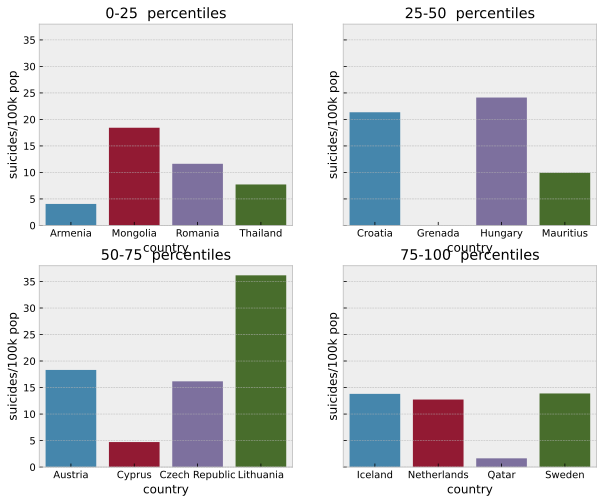

In [108]:
fig, axs = plt.subplots(2, 2, sharey=True, figsize=(10, 8))

axs[0, 0].set_title('0-25  percentiles')
sns.barplot(x=grouped25.index, y='suicides/100k pop', data=grouped25, ax=axs[0,0])

axs[0, 1].set_title('25-50  percentiles')
sns.barplot(x=grouped50.index, y='suicides/100k pop', data=grouped50, ax=axs[0,1])

axs[1, 0].set_title('50-75  percentiles')
sns.barplot(x=grouped75.index, y='suicides/100k pop', data=grouped75, ax=axs[1,0])

axs[1, 1].set_title('75-100  percentiles')
sns.barplot(x=grouped100.index, y='suicides/100k pop', data=grouped100, ax=axs[1,1])

In [109]:
suicide_data_2016.loc[suicide_data_2016['country'] == 'Grenada']

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,gdp_for_year ($),gdp_per_capita ($),generation
10694,Grenada,2016,female,15-24 years,0,9543,0.0,Grenada2016,"1,056,188,593",10838,Millenials
10695,Grenada,2016,female,25-34 years,0,10271,0.0,Grenada2016,"1,056,188,593",10838,Millenials
10696,Grenada,2016,female,35-54 years,0,11222,0.0,Grenada2016,"1,056,188,593",10838,Generation X
10697,Grenada,2016,female,55-74 years,0,6392,0.0,Grenada2016,"1,056,188,593",10838,Boomers
10698,Grenada,2016,female,75+ years,0,2227,0.0,Grenada2016,"1,056,188,593",10838,Silent
10699,Grenada,2016,male,15-24 years,0,9860,0.0,Grenada2016,"1,056,188,593",10838,Millenials
10700,Grenada,2016,male,25-34 years,0,10718,0.0,Grenada2016,"1,056,188,593",10838,Millenials
10701,Grenada,2016,male,35-54 years,0,11746,0.0,Grenada2016,"1,056,188,593",10838,Generation X
10702,Grenada,2016,male,55-74 years,0,5721,0.0,Grenada2016,"1,056,188,593",10838,Boomers
10703,Grenada,2016,male,75+ years,0,1312,0.0,Grenada2016,"1,056,188,593",10838,Silent


I guess there is something wrong with collected data from Grenada, so we will do 2 versions, one with dropped Grenada, and another one with kept

Let's state our hypothesis: <br>
$H_0 :$ There is no significant difference among group means <br>
$H_1 :$ There is significant difference among group means <br>
We take $\alpha = 0.05$ this time as our significance level

In [110]:
F, p = st.f_oneway(grouped25['suicides/100k pop'],
                   grouped50['suicides/100k pop'],
                   grouped75['suicides/100k pop'],
                   grouped100['suicides/100k pop'])

print(f'F: {F}, p: {p}')

F: 0.6830989783198207, p: 0.5792499747750927


We got p-value more than $\alpha$. It indicates strong evidence for the null hypothesis, therefore we retain the null hypothesis because it's statistically significant, and reject the alternative hypothesis.

In [111]:
grouped50.drop(grouped50.loc[grouped50.index == 'Grenada'].index, inplace=True)

In [112]:
F, p = st.f_oneway(grouped25['suicides/100k pop'],
                   grouped50['suicides/100k pop'],
                   grouped75['suicides/100k pop'],
                   grouped100['suicides/100k pop'])

print(f'F: {F}, p: {p}')

F: 1.095533368484392, p: 0.39180369398256726


We got p-value more than $\alpha$. It indicates strong evidence for the null hypothesis, therefore we retain the null hypothesis because it's statistically significant, and reject the alternative hypothesis.

<font size='5'> Final analysis:</font> <br>
As we can see on plots and thanks to ANOVA test there is no significant differences between 'suicides/100k pop' means when data is grouped by 'country' and divided into percentiles of 'gdp_per_capita', so I was wrong about higher 'gdp_per_capita ($)' equals lower suicide rate. <br>
But considering Japan we could predict the test results